The purpose of this notebook is to create choropleth state maps for the presentation.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib 
import numpy as np
import pickle

In [8]:
%%bash
ls ../data/

BRFSSlogo.jpg
Californiabysex.xlsx
FARMER-KIMIKO-INFO371-PS2.ipynb
OB_PREV_ALL_STATES.xlsx
brfss
california_MI_mortality.txt
cdc_diabetes
cdc_wonder
fips_states.txt
gz_2010_us_040_00_5m.json
gz_2010_us_outline_500k.json
laucnty17.txt
mort2016.csv
mort2016.csv.zip
mort2016us.zip
myocardial_infarction.txt
pickles
total_cardiovascular_disease_2014_16.csv
unemployment


In [15]:
states = gpd.read_file('../data/gz_2010_us_040_00_5m.json')

In [16]:
states.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


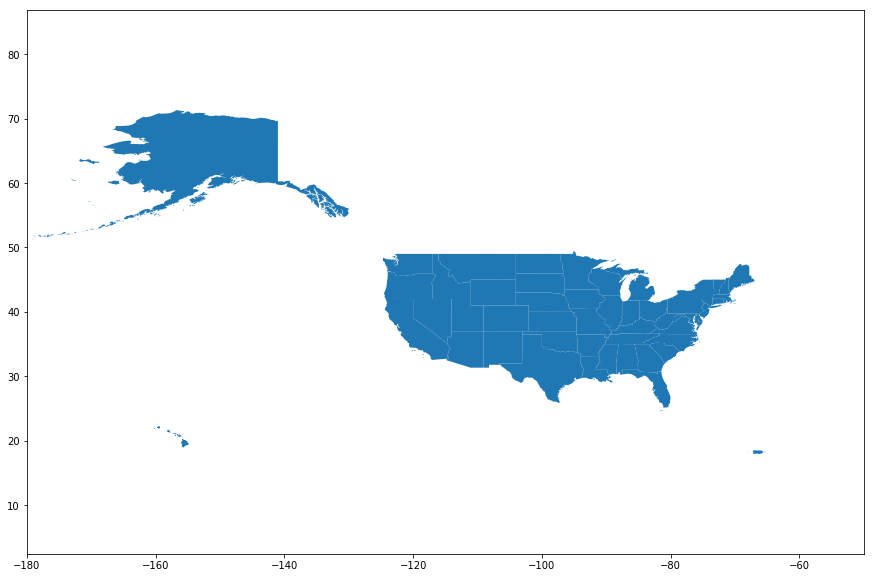

In [20]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax = states.plot(ax=ax)
lims = plt.axis('equal')
ax.set_xlim(-180, -50)
#ax.set_ylim(miny, maxy)
plt.show()

Let's take out Hawaii and Alaska so that we can make a map of the continental U.S.

In [33]:
continental_states = states[(states.NAME != 'Alaska') & (states.NAME != 'Hawaii') & (states.NAME != 'Puerto Rico')]

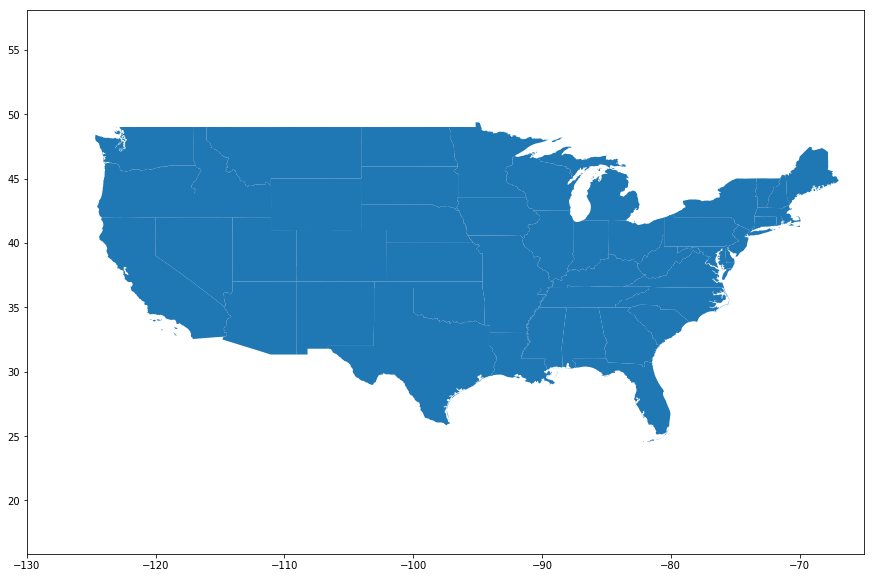

In [42]:
f, ax = plt.subplots(1, figsize=(15, 10))
ax = continental_states.plot(ax=ax)
lims = plt.axis('equal')
ax.set_xlim(-130, -65)
plt.show()

In [45]:
%%bash
ls ../data/pickles

MI_mortality_medicaid_expansion.pkl
any_exercise_list_of_dfs.pkl
cardiac_mortality_obesity_dm_df_by_state.pkl
codebook_dfs_dict.pkl
consensus_var_desc_dict.pkl
dict_of_interpol_covariate_state_dfs.pkl
dict_of_relevant_dfs_raw.pkl
interpol_truncated_MI_mortality_per_state_dict.pkl
list_of_relevant_dfs_raw.pkl
master_codebook_all_years.pkl
master_dict_of_state_dfs_with_covariates.pkl
myocardial_infarction_df_state_mortality_dict.pkl
state_population_by_year_dict.pkl


In [50]:
with open("../data/pickles/cardiac_mortality_obesity_dm_df_by_state.pkl", "rb") as f:
     mortality_obesity_dm_dict = pickle.load(f)

In [52]:
mortality_obesity_dm_dict['California'].head()

,Deaths,obesity_prevalence,diabetes_prevalence,Population,mortality_per_100k
Month,,,,,
1999-01-01,1644.0,41.500000,6.50,33499204.0,4.907579
1999-02-01,1591.0,41.308333,6.55,33530241.0,4.744970
1999-03-01,1630.0,41.116667,6.60,33561278.0,4.856788
1999-04-01,1514.0,40.925000,6.65,33592315.0,4.506983
1999-05-01,1353.0,40.733333,6.70,33623352.0,4.023989


In [56]:
z = mortality_obesity_dm_dict['California'].loc['January 1999'].mortality_per_100k.values[0]

In [62]:
z.values[0]

4.907579296511045

In [107]:
mortality_obesity_dm_dict['California'].Population.tail(13)

Month
2015-12-01    3.924125e+07
2016-01-01    3.925002e+07
2016-02-01             NaN
2016-03-01             NaN
2016-04-01             NaN
2016-05-01             NaN
2016-06-01             NaN
2016-07-01             NaN
2016-08-01             NaN
2016-09-01             NaN
2016-10-01             NaN
2016-11-01             NaN
2016-12-01             NaN
Name: Population, dtype: float64

In [129]:
for state, df in mortality_obesity_dm_dict.items():
    jan_2016_pop = mortality_obesity_dm_dict[state].Population.loc['January 2016'].values[0]
    mortality_obesity_dm_dict[state].Population.fillna(jan_2016_pop, inplace=True)
    mortality_obesity_dm_dict[state].mortality_per_100k = \
    (mortality_obesity_dm_dict[state].Deaths/mortality_obesity_dm_dict[state].Population)*100000

In [130]:
jan_1999_mortality = []
dec_2016_mortality = []

for state in mortality_obesity_dm_dict.keys():
    jan_1999_value = mortality_obesity_dm_dict[state].loc['January 1999'].mortality_per_100k.values[0]
    dec_2016_value = mortality_obesity_dm_dict[state].loc['December 2016'].mortality_per_100k.values[0]
    jan_1999_mortality.append((state, jan_1999_value))
    dec_2016_mortality.append((state, dec_2016_value))

In [131]:
jan_1999_mortality_df = pd.DataFrame(jan_1999_mortality, columns=['state', 'mortality_per_100k'])

In [132]:
jan_1999_choropleth = pd.merge(continental_states, jan_1999_mortality_df, left_on='NAME', right_on='state')

In [133]:
jan_1999_choropleth.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,mortality_per_100k
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999...",Alabama,7.494118
1,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3...",Arizona,5.653065
2,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33....",Arkansas,12.896608
3,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ...",California,4.907579
4,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.190554 40.997607, -106.061181 4...",Colorado,3.525778


In [134]:
dec_2016_mortality_df = pd.DataFrame(dec_2016_mortality, columns=['state', 'mortality_per_100k'])
dec_2016_choropleth = pd.merge(continental_states, dec_2016_mortality_df, left_on='NAME', right_on='state')

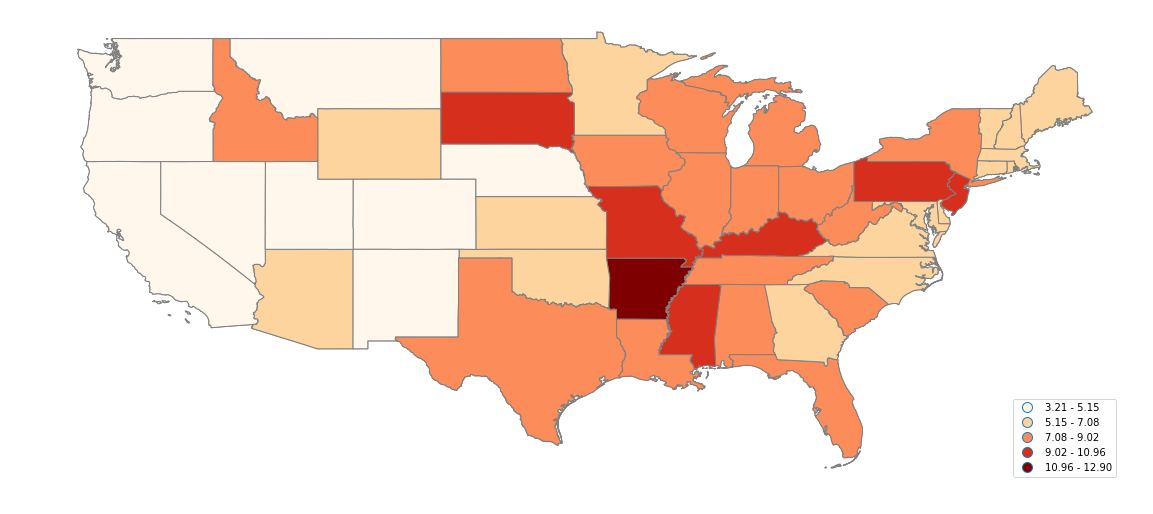

In [217]:
plt.rcParams['figure.figsize'] = [20, 20]

base = jan_1999_choropleth.plot(edgecolor='gray')
jan_1999_choropleth.plot(ax=base, edgecolor='gray', column='mortality_per_100k', cmap='OrRd', scheme='equal_interval', legend=True)
base.get_legend().set_bbox_to_anchor((.98, .2))
plt.axis('off')

fig = plt.gcf()
fig.savefig('../figures/jan_1999_choropleth.png', dpi=150, transparent=True)

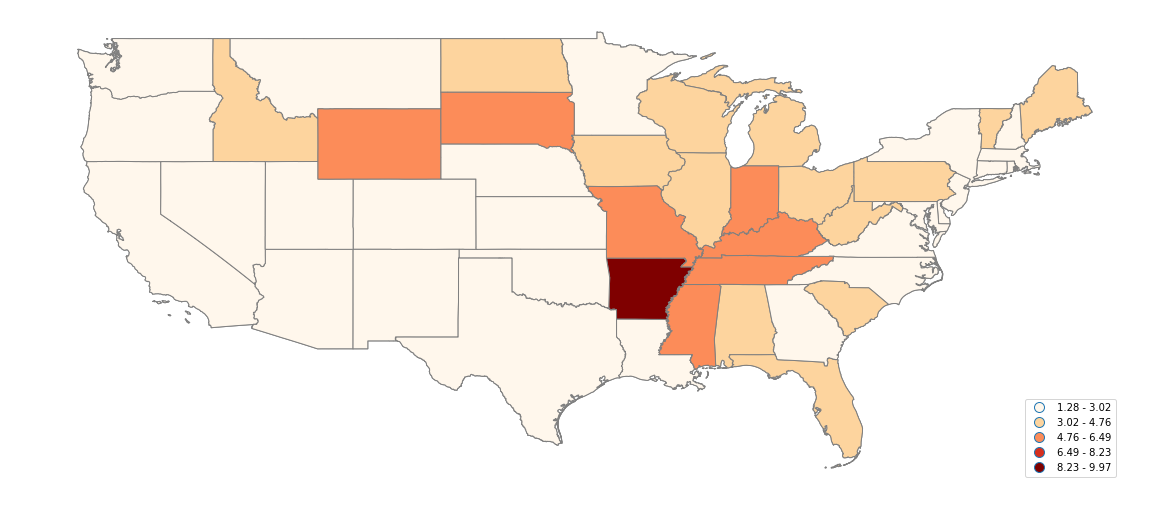

In [216]:
plt.rcParams['figure.figsize'] = [20, 20]

base = dec_2016_choropleth.plot(edgecolor='gray')
dec_2016_choropleth.plot(ax=base, edgecolor='gray', column='mortality_per_100k', cmap='OrRd', scheme='equal_interval', legend=True)
base.get_legend().set_bbox_to_anchor((.98, .2))
plt.axis('off')

fig = plt.gcf()
fig.savefig('../figures/dec_2016_choropleth.png', dpi=150, transparent=True)

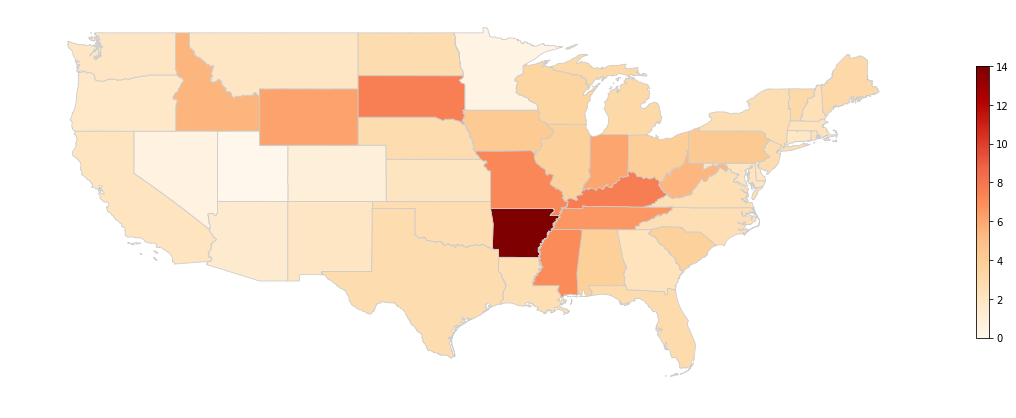

In [211]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'mortality_per_100k'

# set the range for the choropleth
vmin, vmax = 0, 14

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

# create map
dec_2016_choropleth.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

#plt.colorbar(sm, fraction=0.046, pad=0.04)
cbar = fig.colorbar(sm, shrink=0.5)

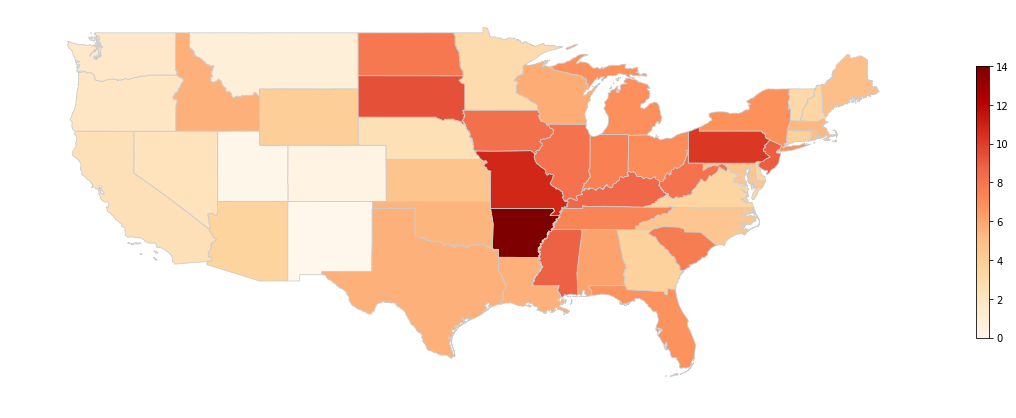

In [212]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'mortality_per_100k'

# set the range for the choropleth
vmin, vmax = 0, 14

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 10))

# create map
jan_1999_choropleth.plot(column=variable, cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

#plt.colorbar(sm, fraction=0.046, pad=0.04)
cbar = fig.colorbar(sm, shrink=0.5)

In [151]:
import pysal.esda.mapclassify as ps
from pysal.esda.mapclassify import User_Defined

from geopandas.plotting import _flatten_multi_geoms, plot_polygon_collection

In [162]:
def plot_dataframe(s, column, binning, cmap,
                   linewidth=1.0, figsize=None, **color_kwds):
    import matplotlib.pyplot as plt

    values = s[column]
    values = np.array(binning.yb)

    fig, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal')

    mn = values.min()
    mx = values.max()

    poly_idx = np.array(
        (s.geometry.type == 'Polygon') | (s.geometry.type == 'MultiPolygon'))
    polys = s.geometry[poly_idx]
    if not polys.empty:
        plot_polygon_collection(ax, polys, values[poly_idx], True,
                                vmin=mn, vmax=mx, cmap=cmap,
                                linewidth=linewidth, **color_kwds)

    plt.draw()
    return ax

In [165]:
ud

              User Defined              
 
Lower            Upper             Count
         x[i] <=  2.000                0
 2.000 < x[i] <=  4.000                4
 4.000 < x[i] <=  6.000               15
 6.000 < x[i] <=  8.000               14
 8.000 < x[i] <= 10.000               13
10.000 < x[i] <= 12.000                2
12.000 < x[i] <= 12.897                1

In [173]:
cmap = plt.cm.ScalarMappable(cmap='YlGn')
cmap.set_array([])
cmap.set_clim(0, 12)

bounds = [0, 1, 2, 3, 4, 5, 6]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.cmap.N)

In [219]:
jan_1999_choropleth[jan_1999_choropleth.NAME == 'Pennsylvania']

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,mortality_per_100k
36,0400000US42,42,Pennsylvania,,44742.703,"POLYGON ((-79.91617100000001 39.720893, -80.07...",Pennsylvania,10.290444


In [220]:
dec_2016_choropleth[dec_2016_choropleth.NAME == 'Pennsylvania']

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,state,mortality_per_100k
36,0400000US42,42,Pennsylvania,,44742.703,"POLYGON ((-79.91617100000001 39.720893, -80.07...",Pennsylvania,3.942358
